## 1. Data Loading

In [1]:
# Loading necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Setting the columns and rows for readability.
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
# Loading the dataset.
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Getting the the number of rows and columns.
lead_df.shape

(9240, 37)

In [5]:
# Inspecting the info of columns.
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Inspecting the statistical summary of numerical columns.
lead_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


## 2. Data Cleaning

- It is observed in previous stage of understanding the dataset step that, during the data collection some of the information are left by default with 'Select' as a value which are actually the null values. Let's start the data cleaning process by replacing all the default selections with null values.

In [7]:
# Casing the 'Select' values to unified alphabetical lower format

lead_df = lead_df.applymap(lambda s:s.lower() if type(s) == str else s)

# Replacing 'select' values with NaN values

lead_df=lead_df.replace('select',np.nan)

In [8]:
# Checking the percentage of missing values present in each columns.
round(lead_df.isnull().sum()/len(lead_df)*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Dropping columns with null value percentage more than 40%. Assigning to lead_df1.
lead_df1 = lead_df[lead_df.columns[lead_df.isnull().sum()/len(lead_df) < 0.40]]

In [10]:
# Checking the percentage of missing values present in each columns.
round(lead_df1.isnull().sum()/len(lead_df1)*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
# Lets inspect the missing columns and try to impute null values with appropriate values.
lead_df1["City"].value_counts()

mumbai                         3222
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

In [12]:
# Since nearly 40% missing values, its better to assign them to Unknown(new category).
lead_df1["City"]= lead_df1["City"].fillna("Unknown")

In [13]:
# Checking the City column.
lead_df1["City"].value_counts()

Unknown                        3669
mumbai                         3222
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

In [14]:
# Lets inspect the missing columns and try to impute null values with appropriate values.
lead_df1["Specialization"].value_counts()

finance management                   976
human resource management            848
marketing management                 838
operations management                503
business administration              403
it projects management               366
supply chain management              349
banking, investment and insurance    338
travel and tourism                   203
media and advertising                203
international business               178
healthcare management                159
hospitality management               114
e-commerce                           112
retail management                    100
rural and agribusiness                73
e-business                            57
services excellence                   40
Name: Specialization, dtype: int64

In [15]:
# Since nearly 36% missing values, its better to assign them to Unknown(new category).
lead_df1["Specialization"]= lead_df1["Specialization"].fillna("Unknown")

In [16]:
# Checking the Specialization column.
lead_df1["Specialization"].value_counts()

Unknown                              3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [17]:
# Lets inspect the missing columns and try to impute null values with appropriate values.
lead_df1["Tags"].value_counts()

will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with eins                                     12
lost to others

In [18]:
# Since nearly 36% missing values, its better to assign them to Unknown(new category).
lead_df1["Tags"]= lead_df1["Tags"].fillna("Unknown")

In [19]:
# Checking the Tags column.
lead_df1["Tags"].value_counts()

Unknown                                              3353
will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [20]:
# Lets inspect the missing columns and try to impute null values with appropriate values.
lead_df1["What matters most to you in choosing a course"].value_counts()

better career prospects      6528
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
# We can impute the null values with mode.
lead_df1["What matters most to you in choosing a course"]= lead_df1["What matters most to you in choosing a course"].fillna(lead_df1["What matters most to you in choosing a course"].mode()[0])

In [22]:
# Checking What matters most to you in choosing a course column.
lead_df1["What matters most to you in choosing a course"].value_counts()

better career prospects      9237
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
# Checking What is your current occupation column.
lead_df1["What is your current occupation"].value_counts()

unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
# We can impute the null values with mode.
lead_df1["What is your current occupation"]= lead_df1["What is your current occupation"].fillna(lead_df1["What is your current occupation"].mode()[0])

In [25]:
# Checking What is your current occupation column.
lead_df1["What is your current occupation"].value_counts()

unemployed              8290
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
# Checking the percentage of missing values present in each columns.
round(lead_df1.isnull().sum()/len(lead_df1)*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [27]:
# Checking Country column.
lead_df1["Country"].value_counts()

india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

In [28]:
# We can impute the null values with mode.
lead_df1["Country"]= lead_df1["Country"].fillna(lead_df1["Country"].mode()[0])

In [29]:
# Checking Country column.
lead_df1["Country"].value_counts()

india                   8953
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

In [30]:
# Checking Page Views Per Visit column.
lead_df1["Page Views Per Visit"].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67  

In [31]:
# We can impute the null values with median.
lead_df1["Page Views Per Visit"]= lead_df1["Page Views Per Visit"].fillna(lead_df1["Page Views Per Visit"].median())

In [32]:
# Checking Page Views Per Visit column.
lead_df1["Page Views Per Visit"].value_counts()

0.00     2189
2.00     1932
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67  

In [33]:
# Checking TotalVisits column.
lead_df1["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [34]:
# We can impute the null values with mode.
lead_df1["TotalVisits"]= lead_df1["TotalVisits"].fillna(lead_df1["TotalVisits"].median())

In [35]:
# Checking TotalVisits column.
lead_df1["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [36]:
# Checking Last Activity column.
lead_df1["Last Activity"].value_counts()

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [37]:
# We can impute the null values with mode.
lead_df1["Last Activity"]= lead_df1["Last Activity"].fillna(lead_df1["Last Activity"].mode()[0])

In [38]:
# Checking Last Activity column.
lead_df1["Last Activity"].value_counts()

email opened                    3540
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [39]:
# Checking Lead Source column.
lead_df1["Lead Source"].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [40]:
# We can impute the null values with mode.
lead_df1["Lead Source"]= lead_df1["Lead Source"].fillna(lead_df1["Lead Source"].mode()[0])

In [41]:
# Checking Lead Source column.
lead_df1["Lead Source"].value_counts()

google               2909
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [42]:
# Checking the percentage of missing values present in each columns.
round(lead_df1.isnull().sum()/len(lead_df1)*100, 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [43]:
# After removing columns and clean up.
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [44]:
# Checking number of rows and columns.
lead_df1.shape

(9240, 30)

In [45]:
# Looking at the statistical summary.
lead_df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9240.0,3.438636,4.819024,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9240.0,2.357440,2.145781,0.0,1.0,2.0,3.00,55.0


In [46]:
# Checking unique categories of each columns.
lead_df1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

- As per above results, we can drop the variables with only one unique categorical valued variable such as Magazine, I agree to pay the amount through cheque, Get updates on DM Content, Update me on Supply Chain Content, Receive More Updates About Our Courses

In [47]:
# Dropping unique valued columns

lead_df1= lead_df1.drop(['Magazine','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses'],axis=1)
lead_df1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

- Alright, now we have atleast 2 unique categories in all the categorical variables listed above.

In [48]:
# But if you observe Prospect ID and lead number, they have all the values unique and hence doesn't contribute for analysis. Hence dropping them in next step.
lead_df1 = lead_df1.drop(['Prospect ID','Lead Number'],axis=1)
lead_df1.shape

(9240, 23)

- As of now, we have covered all the necessary checks in data cleaning process and the action for each step has been taken to treat the data.

## 3. Data Visualisation.

- To get started with Data visualisation, let us first check the target variable and data distribution in it with a countplot.

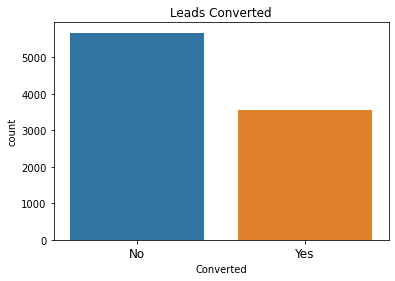

In [49]:
sns.countplot(lead_df1['Converted'])
plt.title('Leads Converted')
plt.xticks(ticks=[0,1],labels=['No','Yes'],fontsize=12)
plt.show()

In [50]:
#to calculate percentage values of converted and non-converted 
print('Percentage of Conversion: ',round(lead_df1[lead_df1['Converted']==1].shape[0]*100/lead_df1.shape[0],2))
print('Percentage of Non-Conversion: ',round(lead_df1[lead_df1['Converted']==0].shape[0]*100/lead_df1.shape[0],2))

Percentage of Conversion:  38.54
Percentage of Non-Conversion:  61.46


- The dataset is not highly imbalanced and hence meaningful insights can be drawn from it with respect to target variable.

In [51]:
#Numerical variables
num_vars=lead_df1._get_numeric_data().columns
list(num_vars)

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [52]:
# Categorical Variables
cat_vars=list(set(lead_df1.columns) - set(num_vars))
list(cat_vars)

['Last Activity',
 'Search',
 'Lead Source',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'X Education Forums',
 'Country',
 'A free copy of Mastering The Interview',
 'Lead Origin',
 'Do Not Email',
 'Through Recommendations',
 'City',
 'Newspaper Article',
 'Digital Advertisement',
 'Last Notable Activity',
 'What matters most to you in choosing a course',
 'Newspaper',
 'Do Not Call']

#### Visualising Categorical columns.

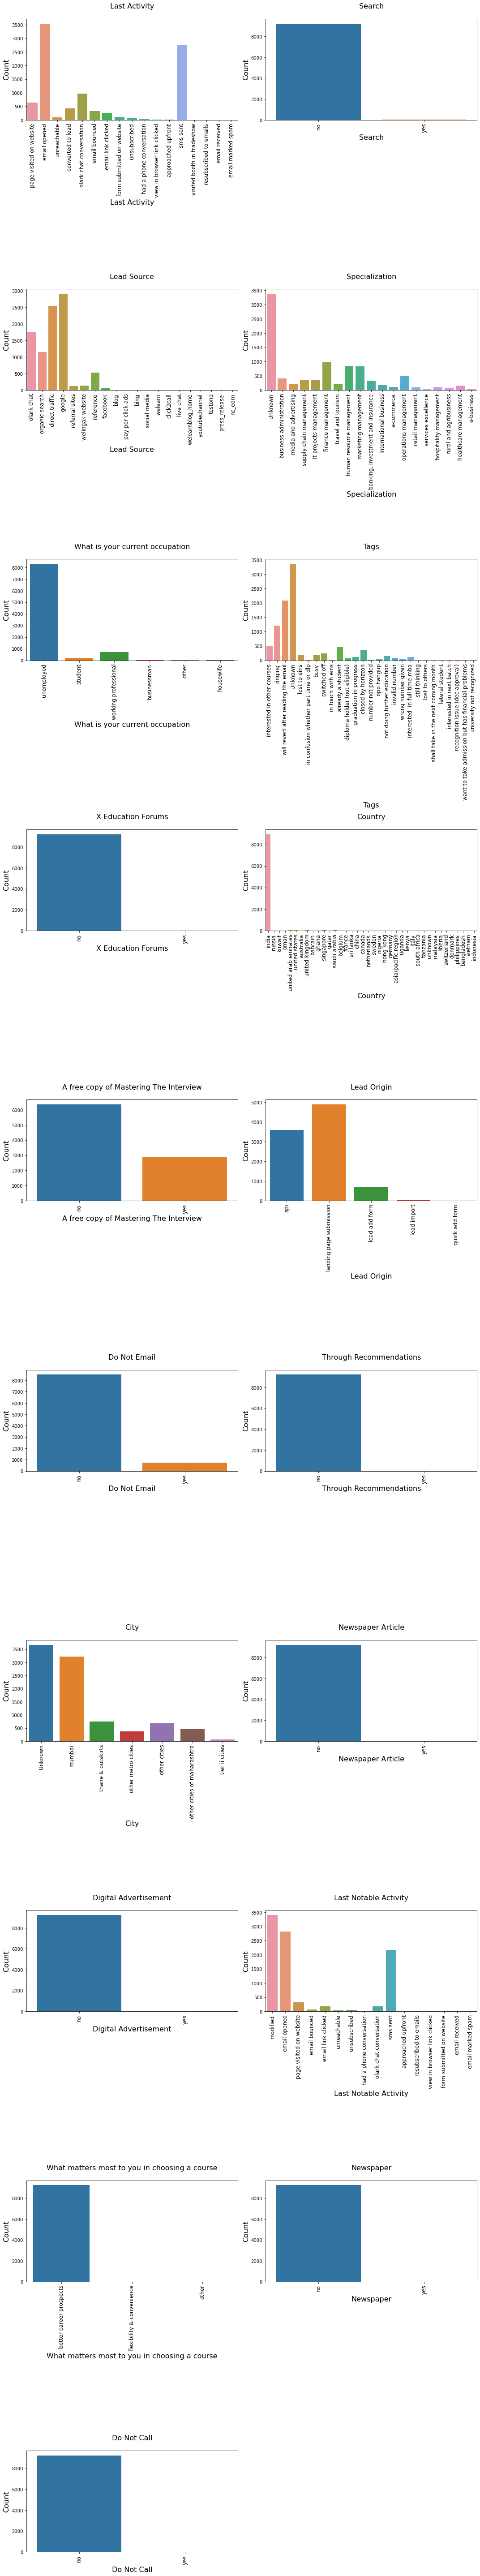

In [53]:
# Countplots of all the categorical columns.
plt.figure(figsize = (15,80))

for col in cat_vars:
    plt.subplot(10,2,cat_vars.index(col)+1)
    sns.countplot(lead_df1[col])
    plt.xticks(fontsize=12,rotation=90)
    plt.xlabel(col,fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.title(col+'\n',fontsize=16)
    plt.tight_layout();

### Inferences:
1. There has been no significant conversions over Recommendations, newspapers article, search and digital advertisements including X education forums.

2. Majority of customers are possible leads after SMS sent or Email being read by them as per the latest activity.

3. One third of the customers have indicated that he/she wants a free copy of 'Mastering the Interview'.

4. google, organic search along with direct traffic has been a main source of lead for customers.

5. The major motto which has been mattered to most of the customers in choosing this course is better career prospects.

6. Landing page submission is a major lead origin to identify the customer to be a lead.

7. Mostly Unemployed and working professionals are enrolling into courses.

8. Most of the possible lead's city status is unknown followed by customers from Mumbai.

9. Majority of Lead's nationality is India.

### The distribution of data in categorical variables with respect to the converted leads and non-converted leads is as follows:-

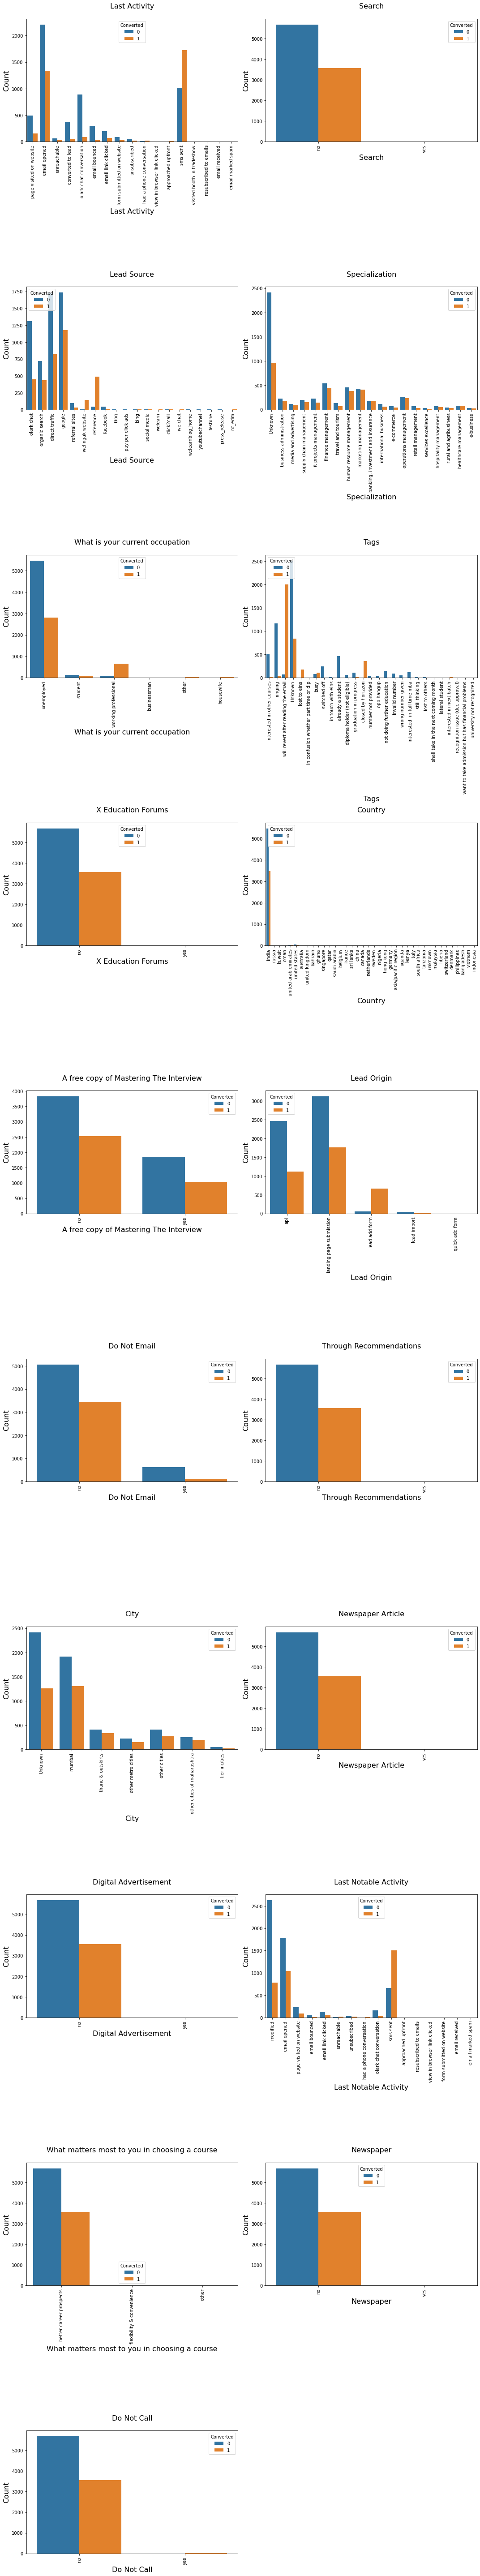

In [54]:
plt.figure(figsize = (15,80))

for col in cat_vars:
    plt.subplot(10,2,cat_vars.index(col)+1)
    sns.countplot(x=col, hue='Converted', data= lead_df1).tick_params(axis='x', rotation = 90)
    plt.xlabel(col,fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.title(col+'\n',fontsize=16)
    plt.tight_layout();

### Inferences

1. Majority of converted leads are from Mumbai city followed by Unknown i.e., they didn't mention the city.

2. Majority of converted leads are from sms sent category from both last activity and last notable activity.

3. The number of converted leads are from google . (lead Source)

4. The percentage of converted leads are higher in case of working professionals.

#### Visualising numerical variables with respect to target variable.

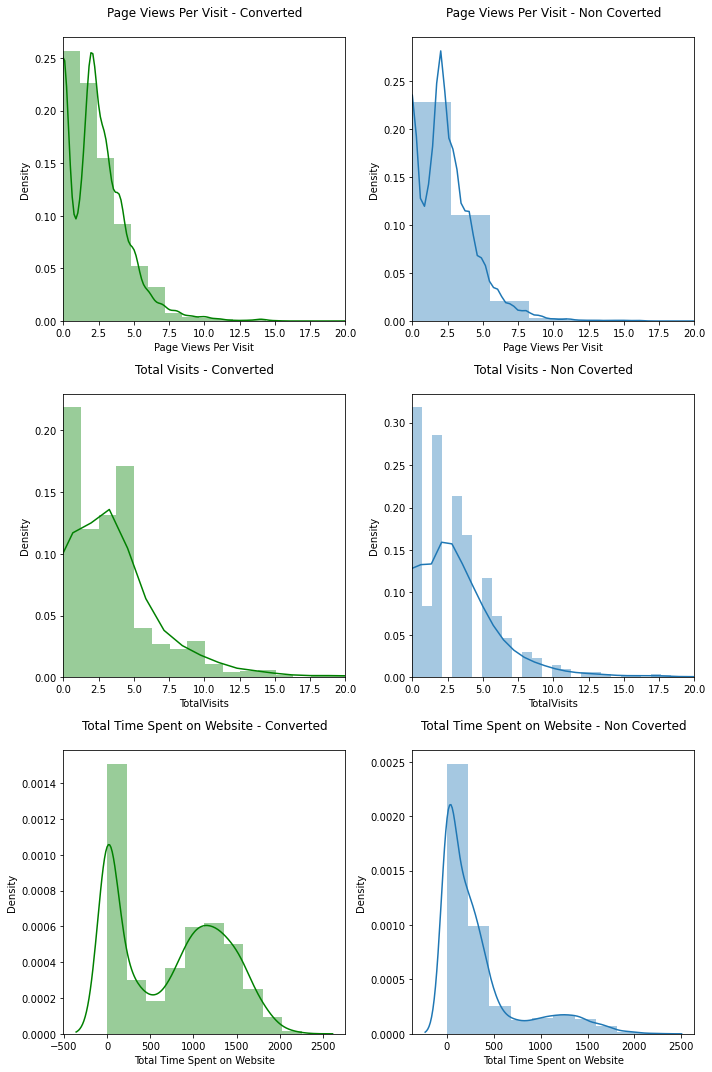

In [55]:
plt.figure(figsize = (10,15))
plt.subplot(3,2,1)
sns.distplot(lead_df1[lead_df1['Converted']==1]['Page Views Per Visit'],color='g', bins = 20)
plt.title('Page Views Per Visit - Converted\n')
plt.xlim(0,20)

plt.subplot(3,2,2)
sns.distplot(lead_df1[lead_df1['Converted']==0]['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit - Non Coverted\n')
plt.xlim(0,20)


plt.subplot(3,2,3)
sns.distplot(lead_df1[lead_df1['Converted']==1]['TotalVisits'],color='g', bins = 200)
plt.title('Total Visits - Converted\n')
plt.xlim(0,20)

plt.subplot(3,2,4)
sns.distplot(lead_df1[lead_df1['Converted']==0]['TotalVisits'], bins = 200)
plt.title('Total Visits - Non Coverted\n')
plt.xlim(0,20)

plt.subplot(3,2,5)
sns.distplot(lead_df1[lead_df1['Converted']==1]['Total Time Spent on Website'],color='g', bins = 10)
plt.title('Total Time Spent on Website - Converted\n')

plt.subplot(3,2,6)
sns.distplot(lead_df1[lead_df1['Converted']==0]['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website - Non Coverted\n')

plt.tight_layout();

### Inferences:
1. It is recommended to make website more interactive in order to ensure customers spend more time to convert. It is observed that leads spending more time on website are at higher chances of conversion.

2. Advertisements to be increased for visitors in order to ensure they engage in website more time and more likely to convert as average visit time for both converted and non-converted are same.

3. Average number of pages on the website viewed during the visits is very less for the converted as well as non-converted, it is advised to minimize the pages and increase effective content on home page.

### Checking for Outliers.

In [56]:
#checking quantiles for totalVisits
lead_df1["TotalVisits"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

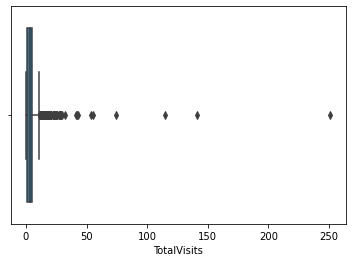

In [57]:
#boxplot for checking outliers
sns.boxplot(lead_df1["TotalVisits"])
plt.show()

In [58]:
#we will cap the TotalVisits at 0.95 percentile to remove the outliers
lead_df1 = lead_df1[(lead_df1["TotalVisits"]<=lead_df1["TotalVisits"].quantile(0.95)) & (lead_df1["TotalVisits"]>=lead_df1["TotalVisits"].quantile(0.05))]

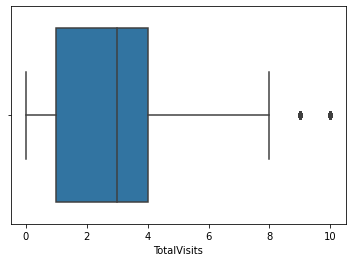

In [59]:
#again plotting boxplot for TotalVisits
sns.boxplot(lead_df1["TotalVisits"])
plt.show()

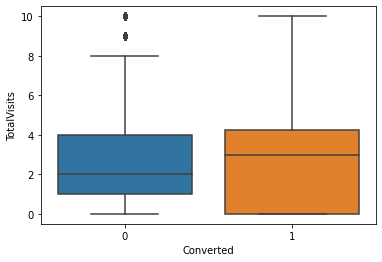

In [60]:
#plotting boxplot for TotalVisits against Converted
sns.boxplot(data=lead_df1, x='Converted', y='TotalVisits')
plt.show()

In [61]:
#checking qualtiles for Total Time Spent on Website
lead_df1["Total Time Spent on Website"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    8887.000000
mean      478.330708
std       545.299717
min         0.000000
5%          0.000000
25%         3.500000
50%       239.000000
75%       914.000000
90%      1372.000000
95%      1554.000000
99%      1833.280000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

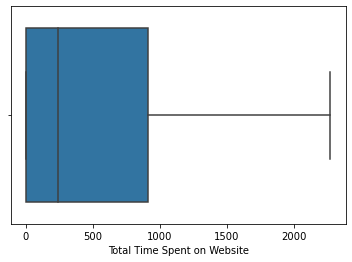

In [62]:
#plotting boxplot for Total Time Spent on Website
sns.boxplot(lead_df1["Total Time Spent on Website"])
plt.show()

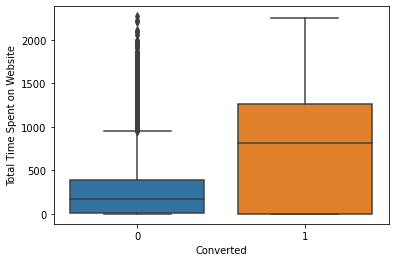

In [63]:
#plotting box plot for Total Time Spent on Website against Converted
sns.boxplot(data=lead_df1, x='Converted', y='Total Time Spent on Website')
plt.show()

In [64]:
#checking quantiles for Page Views per visit
lead_df1["Page Views Per Visit"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    8887.000000
mean        2.244591
std         1.908795
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

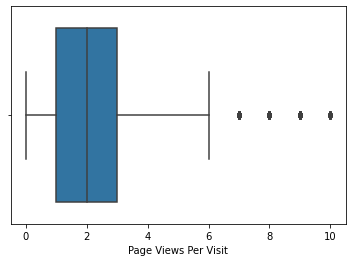

In [65]:
#box plot for Page Views per visit
sns.boxplot(lead_df1["Page Views Per Visit"])
plt.show()

In [66]:
#treating outliers for Page Views Per Visit
lead_df1 = lead_df1[(lead_df1["Page Views Per Visit"]<=lead_df1["Page Views Per Visit"].quantile(0.95)) & (lead_df1["Page Views Per Visit"]>=lead_df1["Page Views Per Visit"].quantile(0.05))]

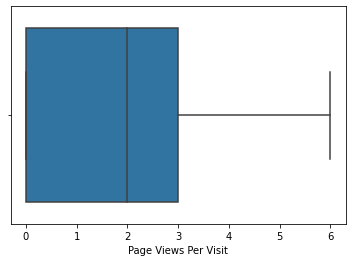

In [67]:
#again plotting boxplot for Page Views Per Visit
sns.boxplot(lead_df1["Page Views Per Visit"])
plt.show()

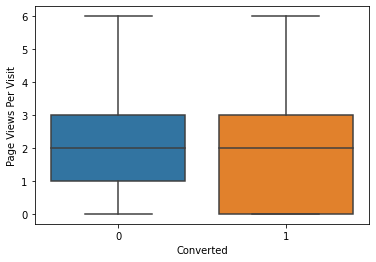

In [68]:
#boxplot for Page Views Per Visit against Converted
sns.boxplot(data=lead_df1, x='Converted', y='Page Views Per Visit')
plt.show()

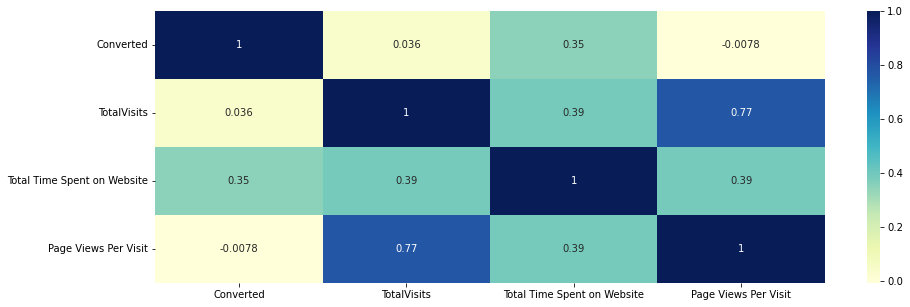

In [69]:
# Correlation
# visualizing correlation by heatmap
plt.figure(figsize=(15,5))
sns.heatmap(lead_df1.corr(),annot=True,cmap="YlGnBu")
plt.show()

- There's some positive correlation between the variable "TotalVisits" and "Page Views Per Visit".

### 4. Data Preparation

In [70]:
cat_vars=list(set(lead_df1.columns) - set(num_vars))
cat_vars

['Last Activity',
 'Search',
 'Lead Source',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'X Education Forums',
 'Country',
 'A free copy of Mastering The Interview',
 'Lead Origin',
 'Do Not Email',
 'Through Recommendations',
 'City',
 'Newspaper Article',
 'Digital Advertisement',
 'Last Notable Activity',
 'What matters most to you in choosing a course',
 'Newspaper',
 'Do Not Call']

In [71]:
# Creating the dummy variables using the 'get_dummies' function and drop first column of each variable 
# excluding converted as its a target variable

dummies = pd.get_dummies(lead_df1[
['A free copy of Mastering The Interview',
 'Through Recommendations',
 'Do Not Call',
 'Lead Source',
 'Digital Advertisement',
 'Last Notable Activity',
 'Do Not Email',
 'Specialization',
 'Country',
 'Newspaper',
 'Tags',
 'What matters most to you in choosing a course',
 'City',
 'Lead Origin',
 'Search',
 'Last Activity',
 'Newspaper Article',
 'What is your current occupation',
 'X Education Forums']], drop_first=True)

# Adding the results to the master dataframe

lead_df2 = pd.concat([lead_df1, dummies], axis=1)
lead_df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,A free copy of Mastering The Interview_yes,Through Recommendations_yes,Do Not Call_yes,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Digital Advertisement_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Do Not Email_yes,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Country_australia,Country_bahrain,Country_bangladesh,Country_belgium,Country_canada,Country_china,Country_denmark,Country_france,Country_germany,Country_ghana,Country_hong kong,Country_india,Country_indonesia,Country_italy,Country_kenya,Country_kuwait,Country_liberia,Country_malaysia,Country_netherlands,Country_nigeria,Country_oman,Country_philippines,Country_qatar,Country_russia,Country_saudi arabia,Country_singapore,Country_south africa,Country_sri lanka,Country_sweden,Country_switzerland,Country_tanzania,Country_uganda,Country_united arab emirates,Country_united kingdom,Country_united states,Country_unknown,Country_vietnam,Newspaper_yes,Tags_already a student,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_in confusion whether part time or dlp,Tags_in touch with eins,Tags_interested in full time mba,Tags_interested in next batch,Tags_interested in other courses,Tags_invalid number,Tags_lateral student,Tags_lost to eins,Tags_lost to others,Tags_not doing further education,Tags_number not provided,Tags_opp hangup,Tags_recognition issue (dec approval),Tags_ringing,Tags_shall take in the next coming month,Tags_still thinking,Tags_switched off,Tags_university not recognized,Tags_want to take admission but has financial problems,Tags_will revert after reading the email,Tags_wrong number given,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,City_mumbai,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Search_yes,Last Ac

In [72]:
# checking the shape of dataframe after creation of dummies.

lead_df2.shape

(8611, 178)

In [73]:
# drop the main variables as dummies created for each of the unique count in them

lead_df2.drop(
['A free copy of Mastering The Interview',
 'Through Recommendations',
 'Do Not Call',
 'Lead Source',
 'Digital Advertisement',
 'Last Notable Activity',
 'Do Not Email',
 'Specialization',
 'Country',
 'Newspaper',
 'Tags',
 'What matters most to you in choosing a course',
 'City',
 'Lead Origin',
 'Search',
 'Last Activity',
 'Newspaper Article',
 'What is your current occupation',
 'X Education Forums'],axis=1,inplace=True)

# checking the final shape of dataset after dropping the main variables

lead_df2.shape

(8611, 159)

In [74]:
# Checking the new dataframe
lead_df2.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview_yes,Through Recommendations_yes,Do Not Call_yes,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Digital Advertisement_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Do Not Email_yes,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Country_australia,Country_bahrain,Country_bangladesh,Country_belgium,Country_canada,Country_china,Country_denmark,Country_france,Country_germany,Country_ghana,Country_hong kong,Country_india,Country_indonesia,Country_italy,Country_kenya,Country_kuwait,Country_liberia,Country_malaysia,Country_netherlands,Country_nigeria,Country_oman,Country_philippines,Country_qatar,Country_russia,Country_saudi arabia,Country_singapore,Country_south africa,Country_sri lanka,Country_sweden,Country_switzerland,Country_tanzania,Country_uganda,Country_united arab emirates,Country_united kingdom,Country_united states,Country_unknown,Country_vietnam,Newspaper_yes,Tags_already a student,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_in confusion whether part time or dlp,Tags_in touch with eins,Tags_interested in full time mba,Tags_interested in next batch,Tags_interested in other courses,Tags_invalid number,Tags_lateral student,Tags_lost to eins,Tags_lost to others,Tags_not doing further education,Tags_number not provided,Tags_opp hangup,Tags_recognition issue (dec approval),Tags_ringing,Tags_shall take in the next coming month,Tags_still thinking,Tags_switched off,Tags_university not recognized,Tags_want to take admission but has financial problems,Tags_will revert after reading the email,Tags_wrong number given,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,City_mumbai,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Search_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last A

## 5. Model Building

In [75]:
# creating a variable X by dropping target variable from dataset

X = lead_df2.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview_yes,Through Recommendations_yes,Do Not Call_yes,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Digital Advertisement_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Do Not Email_yes,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Country_australia,Country_bahrain,Country_bangladesh,Country_belgium,Country_canada,Country_china,Country_denmark,Country_france,Country_germany,Country_ghana,Country_hong kong,Country_india,Country_indonesia,Country_italy,Country_kenya,Country_kuwait,Country_liberia,Country_malaysia,Country_netherlands,Country_nigeria,Country_oman,Country_philippines,Country_qatar,Country_russia,Country_saudi arabia,Country_singapore,Country_south africa,Country_sri lanka,Country_sweden,Country_switzerland,Country_tanzania,Country_uganda,Country_united arab emirates,Country_united kingdom,Country_united states,Country_unknown,Country_vietnam,Newspaper_yes,Tags_already a student,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_in confusion whether part time or dlp,Tags_in touch with eins,Tags_interested in full time mba,Tags_interested in next batch,Tags_interested in other courses,Tags_invalid number,Tags_lateral student,Tags_lost to eins,Tags_lost to others,Tags_not doing further education,Tags_number not provided,Tags_opp hangup,Tags_recognition issue (dec approval),Tags_ringing,Tags_shall take in the next coming month,Tags_still thinking,Tags_switched off,Tags_university not recognized,Tags_want to take admission but has financial problems,Tags_will revert after reading the email,Tags_wrong number given,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,City_mumbai,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Search_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_re

In [76]:
# Putting the target variable in y

y = lead_df2['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting the dataset into 70% train data and 30% test data for building the model using train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [78]:
# Scaling the numerical variables using the MinMaxScaler function

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview_yes,Through Recommendations_yes,Do Not Call_yes,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Digital Advertisement_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Do Not Email_yes,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Country_australia,Country_bahrain,Country_bangladesh,Country_belgium,Country_canada,Country_china,Country_denmark,Country_france,Country_germany,Country_ghana,Country_hong kong,Country_india,Country_indonesia,Country_italy,Country_kenya,Country_kuwait,Country_liberia,Country_malaysia,Country_netherlands,Country_nigeria,Country_oman,Country_philippines,Country_qatar,Country_russia,Country_saudi arabia,Country_singapore,Country_south africa,Country_sri lanka,Country_sweden,Country_switzerland,Country_tanzania,Country_uganda,Country_united arab emirates,Country_united kingdom,Country_united states,Country_unknown,Country_vietnam,Newspaper_yes,Tags_already a student,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_in confusion whether part time or dlp,Tags_in touch with eins,Tags_interested in full time mba,Tags_interested in next batch,Tags_interested in other courses,Tags_invalid number,Tags_lateral student,Tags_lost to eins,Tags_lost to others,Tags_not doing further education,Tags_number not provided,Tags_opp hangup,Tags_recognition issue (dec approval),Tags_ringing,Tags_shall take in the next coming month,Tags_still thinking,Tags_switched off,Tags_university not recognized,Tags_want to take admission but has financial problems,Tags_will revert after reading the email,Tags_wrong number given,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,City_mumbai,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Search_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_re

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# creating a logistic regression and assigning it to a variable

logreg = LogisticRegression()

In [81]:
# using RFE method of variable elimination to count of 20.

rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [82]:
# list of variables with its RFE ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview_yes', False, 42),
 ('Through Recommendations_yes', False, 90),
 ('Do Not Call_yes', False, 85),
 ('Lead Source_blog', False, 127),
 ('Lead Source_click2call', False, 56),
 ('Lead Source_direct traffic', False, 58),
 ('Lead Source_facebook', False, 25),
 ('Lead Source_google', False, 72),
 ('Lead Source_live chat', False, 122),
 ('Lead Source_nc_edm', False, 24),
 ('Lead Source_olark chat', False, 10),
 ('Lead Source_organic search', False, 71),
 ('Lead Source_pay per click ads', False, 120),
 ('Lead Source_press_release', False, 126),
 ('Lead Source_reference', False, 3),
 ('Lead Source_referral sites', False, 50),
 ('Lead Source_social media', False, 119),
 ('Lead Source_testone', False, 111),
 ('Lead Source_welearn', False, 137),
 ('Lead Source_welearnblog_home', False, 132),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_yo

In [83]:
# loading all the variables selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [84]:
# loading the training variable of X with the columns selected by RFE

X_train = X_train[col]

#### Model 1

In [85]:
# fitting the model with the features selected in training variables of x

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6006
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1108.8
Date:                Tue, 14 Jun 2022   Deviance:                       2217.6
Time:                        12:56:19   Pearson chi2:                 7.85e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [86]:
# Since Tags_number not provided has very high p-value, which is insignificant. We drop the column.
X_train.drop('Tags_number not provided', axis = 1, inplace = True)

#### Model 2

In [87]:
# fitting the model with the features remaining after the elimination of Tags_number not provided.

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6007
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1117.6
Date:                Tue, 14 Jun 2022   Deviance:                       2235.2
Time:                        12:56:20   Pearson chi2:                 7.73e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [88]:
# Since Tags_wrong number given has very high p-value, which is insignificant. We drop the column.
X_train.drop('Tags_wrong number given', axis = 1, inplace = True)

#### Model 3

In [89]:
# fitting the model with the features remaining after the elimination of Tags_wrong number given.

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6008
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1132.2
Date:                Tue, 14 Jun 2022   Deviance:                       2264.4
Time:                        12:56:20   Pearson chi2:                 7.55e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [90]:
# Since Lead Source_welingak website has very high p-value, which is insignificant. We drop the column.
X_train.drop('Lead Source_welingak website', axis = 1, inplace = True)

#### Model 4

In [91]:
# fitting the model with the features remaining after the elimination of Lead Source_welingak website.

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6009
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1200.1
Date:                Tue, 14 Jun 2022   Deviance:                       2400.2
Time:                        12:56:20   Pearson chi2:                 7.86e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [92]:
# Since Tags_invalid number has very high p-value, which is insignificant. We drop the column.
X_train.drop('Tags_invalid number', axis = 1, inplace = True)

#### Model 5

In [93]:
# fitting the model with the features remaining after the elimination of Tags_invalid number.

X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6010
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1214.4
Date:                Tue, 14 Jun 2022   Deviance:                       2428.8
Time:                        12:56:21   Pearson chi2:                 7.81e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [94]:
# Since Tags_diploma holder (not eligible) has very high p-value, which is insignificant. We drop the column.
X_train.drop('Tags_diploma holder (not eligible)', axis = 1, inplace = True)

#### Model 6

In [95]:
# fitting the model with the features remaining after the elimination of Tags_diploma holder (not eligible).

X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6011
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1221.3
Date:                Tue, 14 Jun 2022   Deviance:                       2442.6
Time:                        12:56:21   Pearson chi2:                 7.89e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [96]:
# Since Tags_interested  in full time mba has very high p-value, which is insignificant. We drop the column.
X_train.drop('Tags_interested  in full time mba', axis = 1, inplace = True)

#### Model 7

In [97]:
# fitting the model with the features remaining after the elimination of Tags_interested  in full time mba.

X_train_sm = sm.add_constant(X_train)
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6012
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1225.7
Date:                Tue, 14 Jun 2022   Deviance:                       2451.4
Time:                        12:56:22   Pearson chi2:                 7.90e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [98]:
# Since Tags_opp hangup has very high p-value, which is insignificant. We drop the column.
X_train.drop('Tags_opp hangup', axis = 1, inplace = True)

#### Model 8

In [99]:
# fitting the model with the features remaining after the elimination of Tags_opp hangup.

X_train_sm = sm.add_constant(X_train)
logm8 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6013
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1229.9
Date:                Tue, 14 Jun 2022   Deviance:                       2459.9
Time:                        12:56:22   Pearson chi2:                 7.87e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [100]:
# Since all of the p-values are below 0.05, heence we need to check the VIF values.
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                         Features   VIF
1                            Page Views Per Visit  2.57
0                     Total Time Spent on Website  2.21
11       Tags_will revert after reading the email  1.55
12                         Last Activity_sms sent  1.51
2                  Last Notable Activity_modified  1.45
9                                    Tags_ringing  1.23
6                Tags_interested in other courses  1.14
5                         Tags_closed by horizzon  1.09
4                          Tags_already a student  1.07
10                              Tags_switched off  1.06
7                               Tags_lost to eins  1.05
8                Tags_not doing further education  1.04
3   Last Notable Activity_olark chat conversation  1.01


- So, all the features have both p-values and VIF values under 0.05 and 5 respectively. So we can move ahead with our model building.

In [101]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000338
7273    0.983570
4998    0.036156
6668    0.003152
2917    0.066512
1668    0.029643
8738    0.045955
1474    0.026878
4583    0.938925
1786    0.703526
dtype: float64

In [102]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([3.37723595e-04, 9.83569882e-01, 3.61556788e-02, 3.15194490e-03,
       6.65118483e-02, 2.96432611e-02, 4.59547724e-02, 2.68776178e-02,
       9.38924619e-01, 7.03526001e-01])

In [103]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.000338
1,1,0.983570
2,0,0.036156
3,0,0.003152
4,0,0.066512


In [104]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.000338,0
1,1,0.983570,1
2,0,0.036156,0
3,0,0.003152,0
4,0,0.066512,0


## 6. Model Evaluation

In [105]:
# Creating the confusion matrix on train data

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3568,  176],
       [ 281, 2002]], dtype=int64)

In [106]:
# Predicted     not_churn    churn
# Actual
# not_churn        3453       452
# churn             861      1585

# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [107]:
# Check the overall evaluation metrices

print('1. Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),'\n')
print('2. Sensitivity :',TP/(TP+FN),'\n')
print('3. Specificity :',TN/(TN+FP))

1. Accuracy : 0.9241745478679276 

2. Sensitivity : 0.876916338151555 

3. Specificity : 0.9529914529914529


#### Optimizing the Cut off using ROC Curve

In [108]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

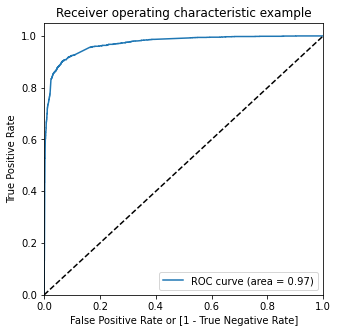

In [110]:
# calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- Area Under The ROC curve = 0.97 is good number to proceed.

In [111]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000338,0,1,0,0,0,0,0,0,0,0,0
1,1,0.983570,1,1,1,1,1,1,1,1,1,1,1
2,0,0.036156,0,1,0,0,0,0,0,0,0,0,0
3,0,0.003152,0,1,0,0,0,0,0,0,0,0,0
4,0,0.066512,0,1,0,0,0,0,0,0,0,0,0


In [112]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.378795     1.000000     0.000000
0.1          0.1  0.825120     0.970215     0.736645
0.2          0.2  0.904596     0.926413     0.891293
0.3          0.3  0.920027     0.907578     0.927618
0.4          0.4  0.922018     0.892685     0.939904
0.5          0.5  0.924175     0.876916     0.952991
0.6          0.6  0.924506     0.855453     0.966613
0.7          0.7  0.920856     0.830924     0.975694
0.8          0.8  0.895802     0.751643     0.983707
0.9          0.9  0.879542     0.698204     0.990118


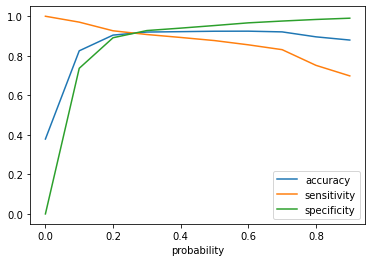

In [113]:
# Plotting it
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

- With above plot, let us take 0.25 as cutt off and see the results of evalution metrics.

In [114]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000338,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.983570,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.036156,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.003152,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.066512,0,1,0,0,0,0,0,0,0,0,0,0


In [115]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3413,  331],
       [ 186, 2097]], dtype=int64)

In [116]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [117]:
# Checking the values of evalation metrices

print('1. Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),'\n')
print('2. Sensitivity :',TP/(TP+FN),'\n')
print('3. Specificity :',TN/(TN+FP))

1. Accuracy : 0.9241745478679276 

2. Sensitivity : 0.9185282522996058 

3. Specificity : 0.9115918803418803


- It can be observed that there is increase in Sensitivity from 87.6% to 91.8 with change in cutt off from 0.5 to o.25 using ROC curve optimization technique. Let us now proceed and predict the test data using the features of train dataset

In [118]:
from sklearn.metrics import precision_score, recall_score

In [119]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9191919191919192

In [120]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.876916338151555

In [121]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6022    0
 6023    0
 6024    0
 6025    0
 6026    1
 Name: Converted, Length: 6027, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6022    0
 6023    0
 6024    1
 6025    0
 6026    0
 Name: Predicted, Length: 6027, dtype: int64)

In [122]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

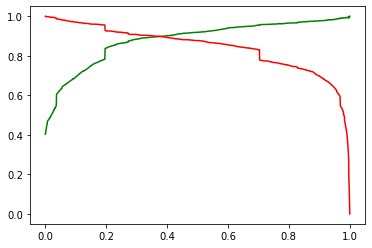

In [123]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Predicting values on Test dataset

In [124]:
X_test.shape

(2584, 158)

In [125]:
y_test.shape

(2584,)

In [126]:
# Transforming the test set as per the scaling of the train set
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [127]:
# Substituting all the columns in the final train model

col = X_train.columns

# Select the columns in X_train for X_test as well

X_test = X_test[col]

# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Tags_already a student,Tags_closed by horizzon,Tags_interested in other courses,Tags_lost to eins,Tags_not doing further education,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,Last Activity_sms sent
376,1.0,0.165113,0.666667,1,0,0,0,0,0,0,0,0,0,0
8914,1.0,0.000888,0.333333,0,0,1,0,0,0,0,0,0,0,0
7331,1.0,0.158899,0.500000,0,0,0,0,0,0,0,1,0,0,0
6344,1.0,0.480692,0.333333,0,0,0,0,0,0,0,0,0,0,0
3783,1.0,0.179316,0.500000,0,0,0,0,0,0,0,0,0,0,0


In [128]:
# Storing the prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting y_test_pred to dataframe
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [129]:
# Remove index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.013906
1,0,0.003332
2,0,0.003266
3,1,0.421170
4,0,0.125328


In [130]:
# Renaming column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.013906
1,0,0.003332
2,0,0.003266
3,1,0.421170
4,0,0.125328


In [131]:
# Making prediction using cut off 0.25 which is a optimized cutt off value

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.013906,0
1,0,0.003332,0
2,0,0.003266,0
3,1,0.421170,1
4,0,0.125328,0


In [132]:
# Creating confusion matrix 
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[1421,  155],
       [ 106,  902]], dtype=int64)

In [133]:
# Substituting the value of true positive
TP = confusion3[1,1]
# Substituting the value of true negatives
TN = confusion3[0,0]
# Substituting the value of false positives
FP = confusion3[0,1] 
# Substituting the value of false negatives
FN = confusion3[1,0]

In [134]:
# Check the evaluation metrices

print('1. Accuracy :',metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),'\n')
print('2. Sensitivity :',TP/(TP+FN),'\n')
print('3. Specificity :',TN/(TN+FP))

1. Accuracy : 0.8989938080495357 

2. Sensitivity : 0.8948412698412699 

3. Specificity : 0.9016497461928934


In [135]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8533585619678334

In [136]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8948412698412699

### Final Summary:
- We have checked both Sensitivity-Specificity as well as Precision and Recall Metrics
- Accuracy, Sensitivity and Specificity values
-  Train Accuracy : 92.4% Sensitivity : 91.8% Specificity : 91.1%
-  Test Accuracy : 89.8% Sensitivity : 89.4% Specificity : 90.1%
- Precision and Recall
-  Train Precision : 70.2% Recall : 80%
-  Test Precision : 85.3% Recall : 89.4%